In [1]:
import pandas as pd

# 为每只股票指定权重
weights = {
    '0005.HK': 0.1,  # 金融：汇丰控股
    '0883.HK': 0.5,   # 能源：中国海洋石油
    '0941.HK': 0.2,    # 电信服务：中国移动
    '9633.HK': 0.2,    # 消费品：农夫山泉
}

# 初始化一个空的 DataFrame 用于存储投资组合的日回报
portfolio_returns = pd.DataFrame()

for stock, weight in weights.items():
    # 读取每只股票的数据
    stock_data = pd.read_csv(f'{stock}.csv', index_col='Date', parse_dates=True)

    # 计算日回报
    daily_returns = stock_data['Adj Close'].pct_change()

    # 将日回报按照权重加入到投资组合的 DataFrame
    portfolio_returns[stock] = daily_returns * weight

# 计算整个投资组合的日回报
portfolio_returns['Total'] = portfolio_returns.sum(axis=1)

# 输出投资组合的日回报
print(portfolio_returns['Total'])


Date
2023-01-26    0.000000
2023-01-27    0.008268
2023-01-30   -0.010459
2023-01-31   -0.002668
2023-02-01    0.012050
                ...   
2024-01-15    0.000105
2024-01-16   -0.005854
2024-01-17   -0.024595
2024-01-18    0.007109
2024-01-19    0.001484
Name: Total, Length: 243, dtype: float64


                    Strategy
------------------  ----------
Start Period        2023-01-26
End Period          2024-01-19
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   18.64%
CAGR﹪              12.79%

Sharpe              1.03
Prob. Sharpe Ratio  84.39%
Sortino             1.53
Sortino/√2          1.08
Omega               1.18

Max Drawdown        -7.96%
Longest DD Days     121

Gain/Pain Ratio     0.18
Gain/Pain (1M)      1.35

Payoff Ratio        1.0
Profit Factor       1.18
Common Sense Ratio  1.25
CPC Index           0.64
Tail Ratio          1.06
Outlier Win Ratio   3.26
Outlier Loss Ratio  2.99

MTD                 -2.34%
3M                  -4.48%
6M                  6.63%
YTD                 -2.34%
1Y                  18.64%
3Y (ann.)           12.79%
5Y (ann.)           12.79%
10Y (ann.)          12.79%
All-time (ann.)     12.79%

Avg. Drawdown       -2.98%
Avg. Drawdown Days  22
Recovery Factor     2.36
Ulcer Index         0.03
Serenity Index      1.

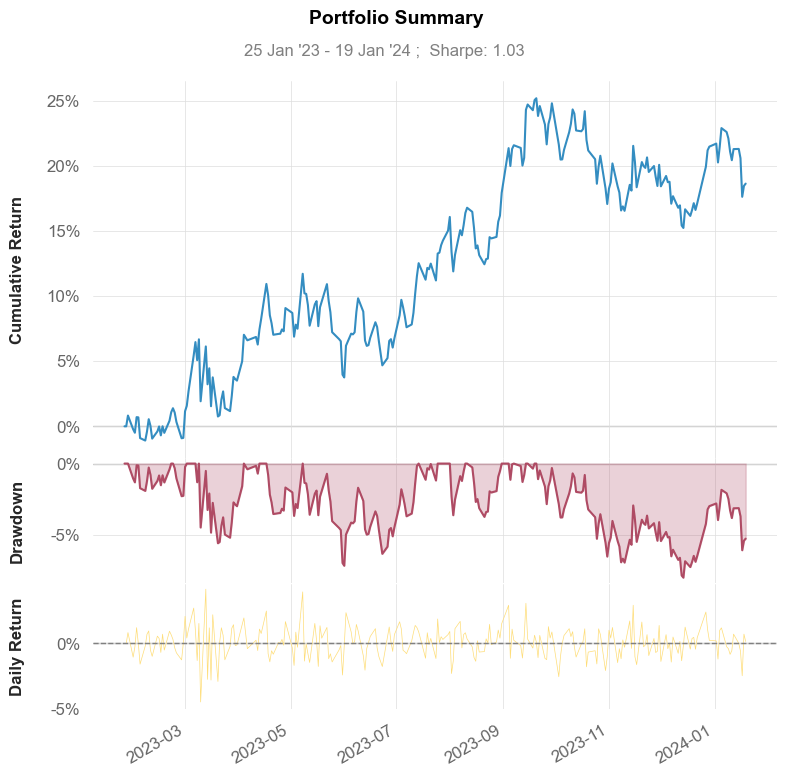

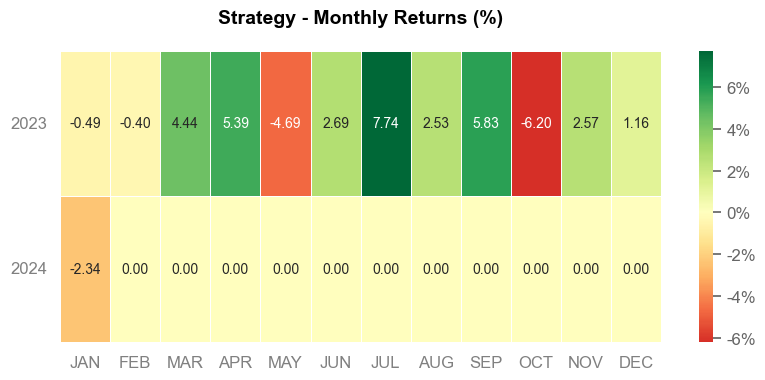

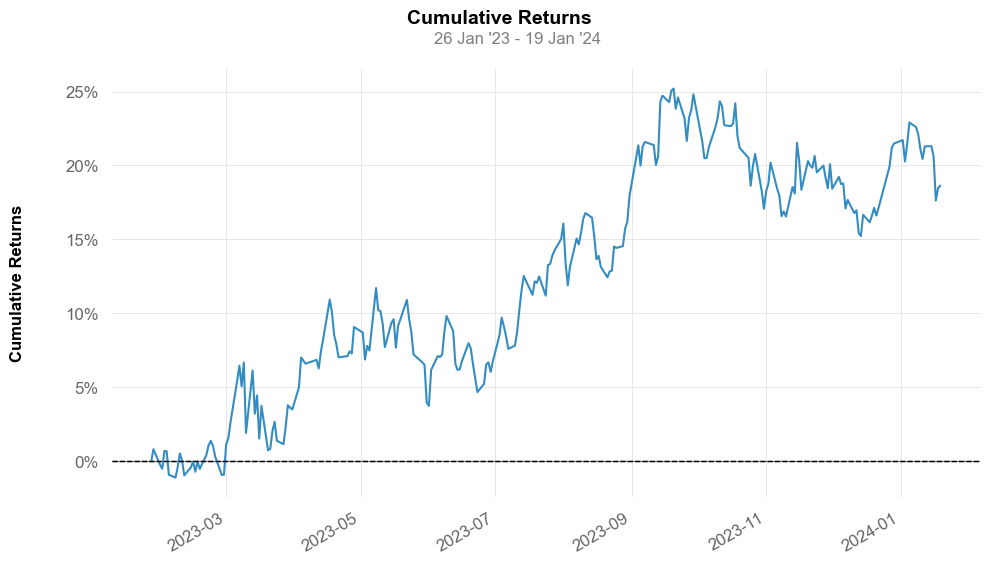

In [2]:
import quantstats as qs
import matplotlib.pyplot as plt

# 将日回报率转换为 Quantstats 可以处理的格式
returns = portfolio_returns['Total']

# 打印基本的统计数据
qs.reports.basic(returns)

# 生成包含详细分析的完整报告
qs.reports.html(returns, output='投资组合分析报告.html')

# 使用 Quantstats 绘制投资组合的累积回报图
qs.plots.returns(returns)

plt.show()  # 显示图表

In [3]:
# 检查前几行数据
print(returns.head())

# 检查数据类型和索引
print(returns.dtypes)
print(returns.index)

Date
2023-01-26    0.000000
2023-01-27    0.008268
2023-01-30   -0.010459
2023-01-31   -0.002668
2023-02-01    0.012050
Name: Total, dtype: float64
float64
DatetimeIndex(['2023-01-26', '2023-01-27', '2023-01-30', '2023-01-31',
               '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-06',
               '2023-02-07', '2023-02-08',
               ...
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19'],
              dtype='datetime64[ns]', name='Date', length=243, freq=None)
